In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import os
import sys
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
import matplotlib
import tqdm
import utils as utils
import scienceplots
from gpytorch.distributions import MultivariateNormal
plt.style.use('science')

base_dir = os.path.join(os.getcwd(), '..')
sys.path.append(base_dir)

import fit_FaIRGP as fairgp

In [4]:
# Get SSP126 distribution
train_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['historical', 'ssp245', 'ssp370', 'ssp585']}}
train_data = fairgp.make_data(train_cfg)

test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['ssp126']}}
test_data = fairgp.make_data(test_cfg)

fairgpmodel = fairgp.make_model(train_cfg, train_data).eval()
state_dict = torch.load('../data/models/leave-one-out-ssp/ssp126/FaIRGP/state_dict.pt')
fairgpmodel.load_state_dict(state_dict)

test_scenarios = test_data.scenarios
test_times = test_scenarios.timesteps
test_tas_ssp126 = test_scenarios.tas
test_tas_fair = fairgpmodel._compute_mean(test_scenarios)

with torch.no_grad():
    fairgp_test_posterior = fairgpmodel(test_scenarios)
    fairgp_posterior_ssp126 = fairgpmodel.likelihood(fairgp_test_posterior)
    fairgp_posterior_ssp126 = MultivariateNormal(mean=fairgp_posterior_ssp126.mean + test_tas_fair,
                                                 covariance_matrix=fairgp_posterior_ssp126.covariance_matrix)

/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/lazy_tensor.py:25: UserWarning: gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense
  warnings.warn("gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense")
/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/non_lazy_tensor.py:13: UserWarning: gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator
  warnings.warn("gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator")


In [5]:
# Get SSP245 distribution
train_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['historical', 'ssp126', 'ssp370', 'ssp585']}}
train_data = fairgp.make_data(train_cfg)

test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['ssp245']}}
test_data = fairgp.make_data(test_cfg)

fairgpmodel = fairgp.make_model(train_cfg, train_data).eval()
state_dict = torch.load('../data/models/leave-one-out-ssp/ssp245/FaIRGP/state_dict.pt')
fairgpmodel.load_state_dict(state_dict)

test_scenarios = test_data.scenarios
test_times = test_scenarios.timesteps
test_tas_ssp245 = test_scenarios.tas
test_tas_fair = fairgpmodel._compute_mean(test_scenarios)

with torch.no_grad():
    fairgp_test_posterior = fairgpmodel(test_scenarios)
    fairgp_posterior_ssp245 = fairgpmodel.likelihood(fairgp_test_posterior)
    fairgp_posterior_ssp245 = MultivariateNormal(mean=fairgp_posterior_ssp245.mean + test_tas_fair,
                                                 covariance_matrix=fairgp_posterior_ssp245.covariance_matrix)

/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/lazy_tensor.py:25: UserWarning: gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense
  warnings.warn("gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense")
/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/non_lazy_tensor.py:13: UserWarning: gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator
  warnings.warn("gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator")


In [6]:
# Get SSP370 distribution
train_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['historical', 'ssp126', 'ssp245', 'ssp585']}}
train_data = fairgp.make_data(train_cfg)

test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['ssp370']}}
test_data = fairgp.make_data(test_cfg)

fairgpmodel = fairgp.make_model(train_cfg, train_data).eval()
state_dict = torch.load('../data/models/leave-one-out-ssp/ssp370/FaIRGP/state_dict.pt')
fairgpmodel.load_state_dict(state_dict)

test_scenarios = test_data.scenarios
test_times = test_scenarios.timesteps
test_tas_ssp370 = test_scenarios.tas
test_tas_fair = fairgpmodel._compute_mean(test_scenarios)

with torch.no_grad():
    fairgp_test_posterior = fairgpmodel(test_scenarios)
    fairgp_posterior_ssp370 = fairgpmodel.likelihood(fairgp_test_posterior)
    fairgp_posterior_ssp370 = MultivariateNormal(mean=fairgp_posterior_ssp370.mean + test_tas_fair,
                                                 covariance_matrix=fairgp_posterior_ssp370.covariance_matrix)

/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/lazy_tensor.py:25: UserWarning: gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense
  warnings.warn("gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense")
/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/non_lazy_tensor.py:13: UserWarning: gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator
  warnings.warn("gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator")


In [7]:
# Get SSP585 distribution
train_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['historical', 'ssp126', 'ssp245', 'ssp370']}}
train_data = fairgp.make_data(train_cfg)

test_cfg = {'dataset' : {'dirpath': '../data/', 'keys': ['ssp585']}}
test_data = fairgp.make_data(test_cfg)

fairgpmodel = fairgp.make_model(train_cfg, train_data).eval()
state_dict = torch.load('../data/models/leave-one-out-ssp/ssp585/FaIRGP/state_dict.pt')
fairgpmodel.load_state_dict(state_dict)

test_scenarios = test_data.scenarios
test_times = test_scenarios.timesteps
test_tas_ssp585 = test_scenarios.tas
test_tas_fair = fairgpmodel._compute_mean(test_scenarios)

with torch.no_grad():
    fairgp_test_posterior = fairgpmodel(test_scenarios)
    fairgp_posterior_ssp585 = fairgpmodel.likelihood(fairgp_test_posterior)
    fairgp_posterior_ssp585 = MultivariateNormal(mean=fairgp_posterior_ssp585.mean + test_tas_fair,
                                                 covariance_matrix=fairgp_posterior_ssp585.covariance_matrix)

/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/lazy_tensor.py:25: UserWarning: gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense
  warnings.warn("gpytorch.lazy.delazify is deprecated in favor of linear_operator.to_dense")
/home/bouabid/.pyenv/versions/sandbox/lib/python3.8/site-packages/gpytorch/lazy/non_lazy_tensor.py:13: UserWarning: gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator
  warnings.warn("gpytorch.lazy.lazify is deprecated in favor of linear_operator.to_linear_operator")


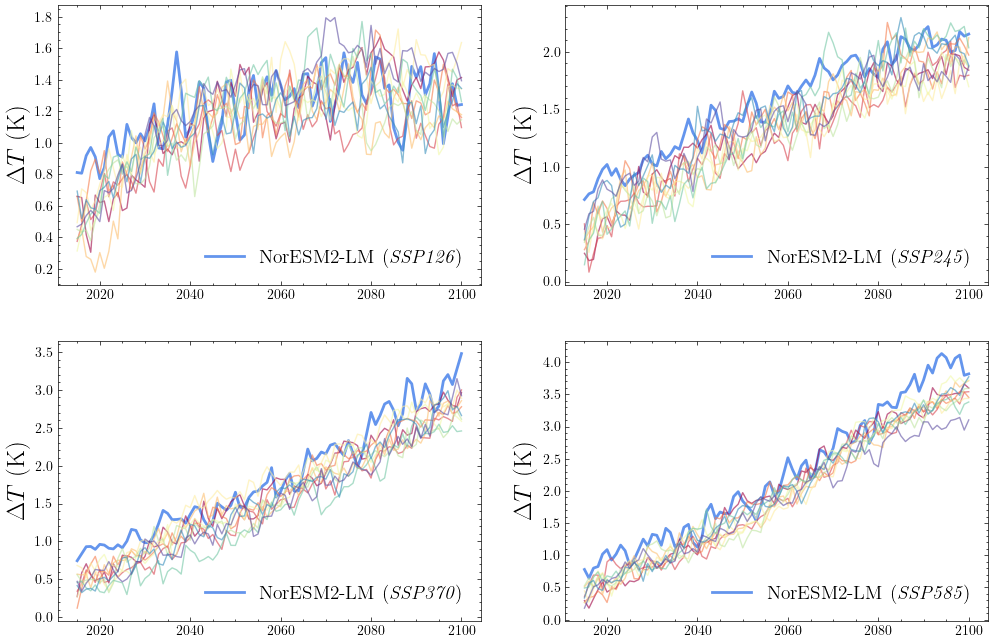

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

n_samples = 10
choice = 'Spectral'
cmap = matplotlib.cm.get_cmap(choice)
cwheel = [cmap(x) for x in np.linspace(0, 1, n_samples)]
torch.random.manual_seed(5)

ax[0, 0].plot(test_times, test_tas_ssp126, lw=2, color='cornflowerblue', label=r'NorESM2-LM (\textit{SSP126})')
ax[0, 0].set_ylabel(r'$\Delta T$ (K)', fontsize=18)
for i in range(n_samples):
    ax[0, 0].plot(test_times, fairgp_posterior_ssp126.sample(), alpha=0.6, color=cwheel[i])
ax[0, 0].legend(fontsize=14, loc='lower right')
    
ax[0, 1].plot(test_times, test_tas_ssp245, lw=2, color='cornflowerblue', label=r'NorESM2-LM (\textit{SSP245})')
ax[0, 1].set_ylabel(r'$\Delta T$ (K)', fontsize=18)
for i in range(n_samples):
    ax[0, 1].plot(test_times, fairgp_posterior_ssp245.sample(), alpha=0.6, color=cwheel[i])
ax[0, 1].legend(fontsize=14, loc='lower right')
    
ax[1, 0].plot(test_times, test_tas_ssp370, lw=2, color='cornflowerblue', label=r'NorESM2-LM (\textit{SSP370})')
ax[1, 0].set_ylabel(r'$\Delta T$ (K)', fontsize=18)
for i in range(n_samples):
    ax[1, 0].plot(test_times, fairgp_posterior_ssp370.sample(), alpha=0.6, color=cwheel[i])
ax[1, 0].legend(fontsize=14, loc='lower right')
    
ax[1, 1].plot(test_times, test_tas_ssp585, lw=2, color='cornflowerblue', label=r'NorESM2-LM (\textit{SSP585})')
ax[1, 1].set_ylabel(r'$\Delta T$ (K)', fontsize=18)
for i in range(n_samples):
    ax[1, 1].plot(test_times, fairgp_posterior_ssp585.sample(), alpha=0.6, color=cwheel[i])
ax[1, 1].legend(fontsize=14, loc='lower right')

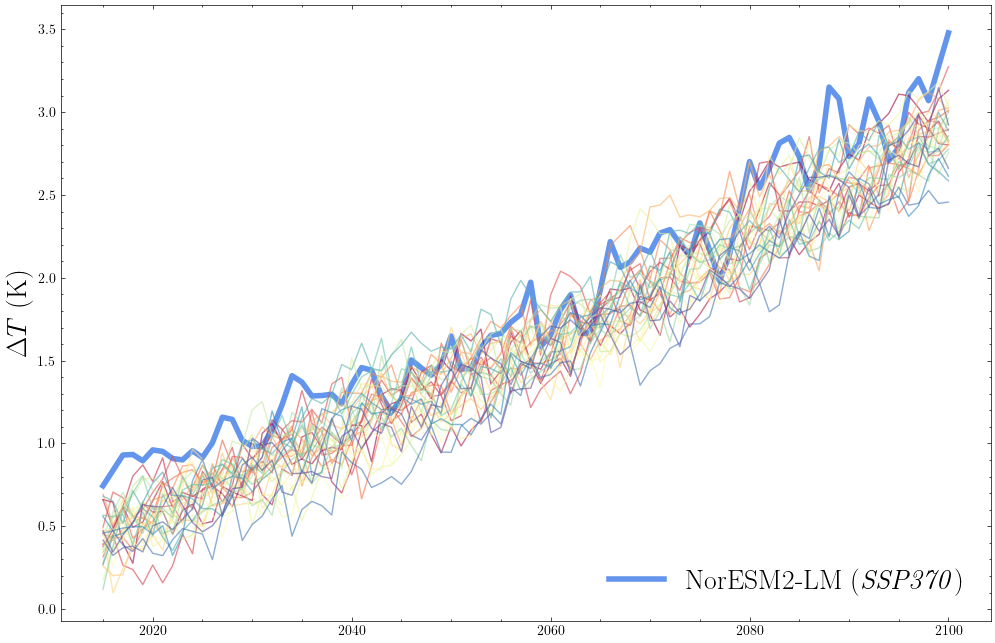

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

n_samples = 30
choice = 'Spectral'
cmap = matplotlib.cm.get_cmap(choice)
cwheel = [cmap(x) for x in np.linspace(0, 1, n_samples)]
torch.random.manual_seed(5)

ax.plot(test_times, test_tas_ssp370, lw=4, color='cornflowerblue', label=r'NorESM2-LM (\textit{SSP370})')
ax.set_ylabel(r'$\Delta T$ (K)', fontsize=20)
for i in range(n_samples):
    ax.plot(test_times, fairgp_posterior_ssp370.sample(), alpha=0.6, color=cwheel[i])
ax.legend(fontsize=20, loc='lower right')

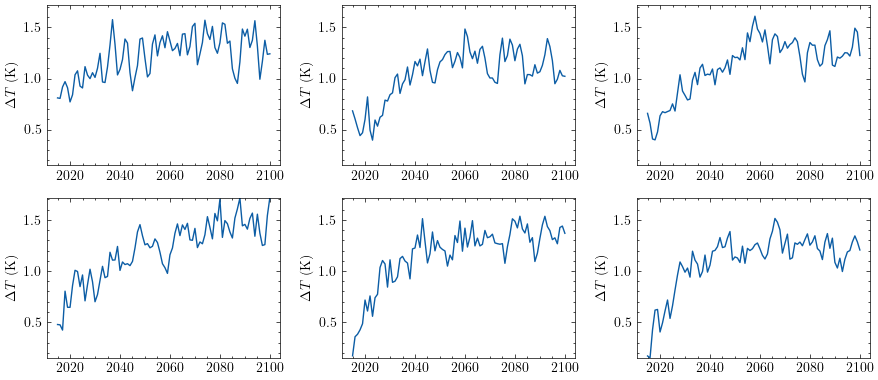

In [60]:
n_samples = 5
nrow = 2
ncol = 3

fig, ax = plt.subplots(nrow, ncol, figsize=(ncol * 3, 4))

torch.random.manual_seed(5)
trajectories = torch.cat([fairgp_posterior_ssp126.sample(torch.Size([n_samples])),
                          test_tas_ssp126.unsqueeze(0)], dim=0)
ymax, ymin = trajectories.max(), trajectories.min()
rdm_idx = torch.randperm(ncol * nrow)

for i, trajectory_idx in enumerate(rdm_idx):
    ax[i // ncol, i % ncol].plot(test_times, trajectories[trajectory_idx])
    ax[i // ncol, i % ncol].set_ylim(ymin, ymax)
    ax[i // ncol, i % ncol].set_ylabel(r'$\Delta T$ (K)')
plt.tight_layout()

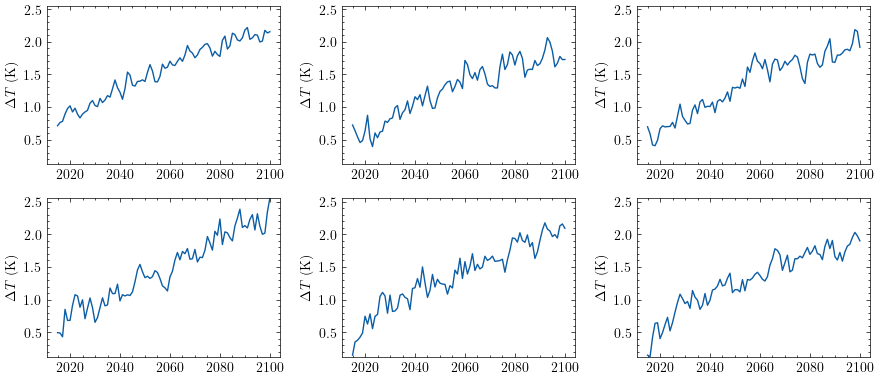

In [61]:
n_samples = 5
nrow = 2
ncol = 3

fig, ax = plt.subplots(nrow, ncol, figsize=(ncol * 3, 4))

torch.random.manual_seed(5)
trajectories = torch.cat([fairgp_posterior_ssp245.sample(torch.Size([n_samples])),
                          test_tas_ssp245.unsqueeze(0)], dim=0)
ymax, ymin = trajectories.max(), trajectories.min()
rdm_idx = torch.randperm(ncol * nrow)

for i, trajectory_idx in enumerate(rdm_idx):
    ax[i // ncol, i % ncol].plot(test_times, trajectories[trajectory_idx])
    ax[i // ncol, i % ncol].set_ylim(ymin, ymax)
    ax[i // ncol, i % ncol].set_ylabel(r'$\Delta T$ (K)')
plt.tight_layout()

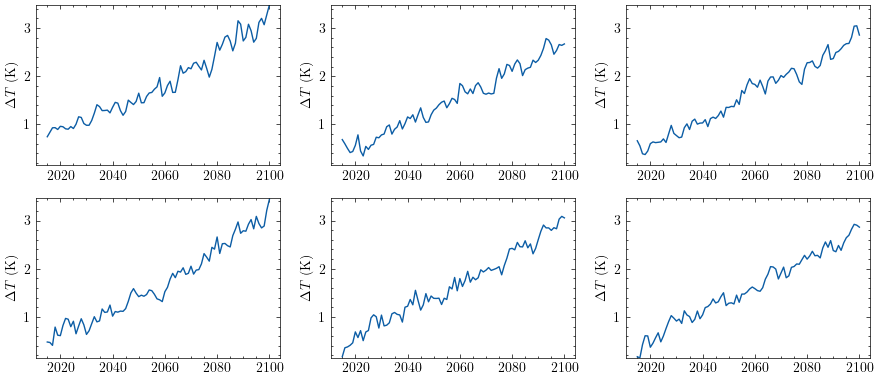

In [62]:
n_samples = 5
nrow = 2
ncol = 3

fig, ax = plt.subplots(nrow, ncol, figsize=(ncol * 3, 4))

torch.random.manual_seed(5)
trajectories = torch.cat([fairgp_posterior_ssp370.sample(torch.Size([n_samples])),
                          test_tas_ssp370.unsqueeze(0)], dim=0)
ymax, ymin = trajectories.max(), trajectories.min()
rdm_idx = torch.randperm(ncol * nrow)

for i, trajectory_idx in enumerate(rdm_idx):
    ax[i // ncol, i % ncol].plot(test_times, trajectories[trajectory_idx])
    ax[i // ncol, i % ncol].set_ylim(ymin, ymax)
    ax[i // ncol, i % ncol].set_ylabel(r'$\Delta T$ (K)')
plt.tight_layout()

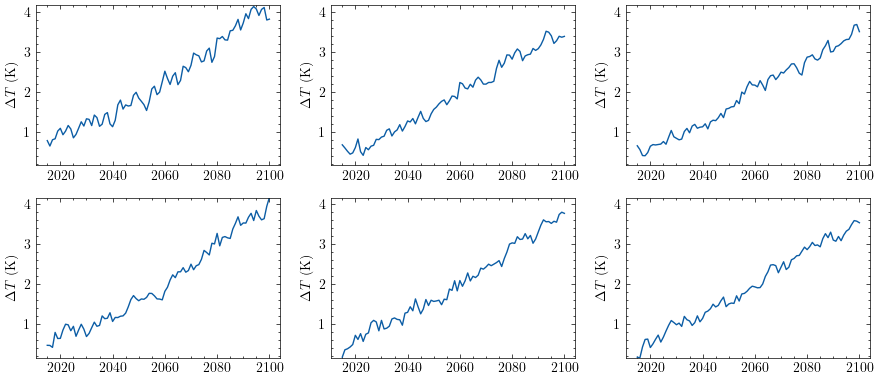

In [64]:
n_samples = 5
nrow = 2
ncol = 3

fig, ax = plt.subplots(nrow, ncol, figsize=(ncol * 3, 4))

torch.random.manual_seed(5)
trajectories = torch.cat([fairgp_posterior_ssp585.sample(torch.Size([n_samples])),
                          test_tas_ssp585.unsqueeze(0)], dim=0)
ymax, ymin = trajectories.max(), trajectories.min()
rdm_idx = torch.randperm(ncol * nrow)

for i, trajectory_idx in enumerate(rdm_idx):
    ax[i // ncol, i % ncol].plot(test_times, trajectories[trajectory_idx])
    ax[i // ncol, i % ncol].set_ylim(ymin, ymax)
    ax[i // ncol, i % ncol].set_ylabel(r'$\Delta T$ (K)')
plt.tight_layout()